<a href="https://colab.research.google.com/github/AgustinGurvich/TMD/blob/main/TMD_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

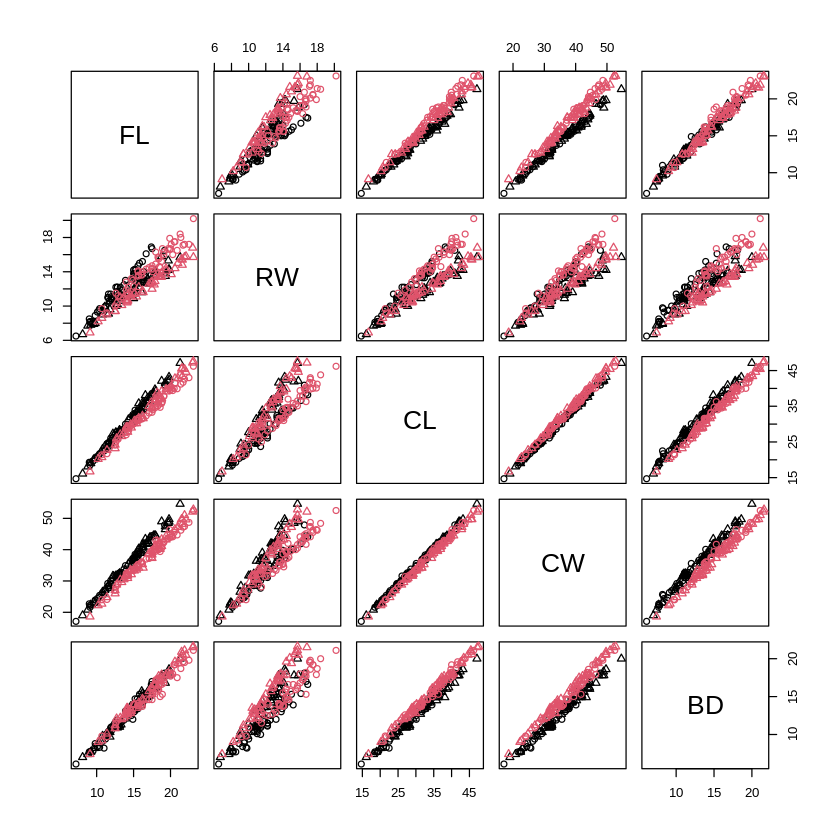

In [ ]:
library(MASS)
install.packages("e1071") 
library(e1071)
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))
crabs.vars <- crabs[,4:8] #Sacamos las variables para usarlas

Función para chequear si los clusters son correctos

In [ ]:
check.cluster <- function(base,cc){
  cont.table <- table(base,cc)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
}

Hacemos kmeans sin hacer nada con los datos, evidentemente no funciona

In [ ]:
cc <- kmeans(crabs.vars,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.5 %
    cc
base  1  2
   B 54 46
   O 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  2  1
   F 54 46
   M 53 47


Kmeans aplicando escala logaritmica a todos los datos, no se ven mejoras en el proceso

In [ ]:
crabs.vars.log <- log(crabs.vars)
cc <- kmeans(crabs.vars.log,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  2  1
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  1  2
   F 64 36
   M 61 39


Escalamos las variables

In [ ]:
crabs.vars.log.scale <- scale(crabs.vars.log)
cc <- kmeans(crabs.vars.log.scale,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  1  2
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  2  1
   F 64 36
   M 61 39


Aplicamos PCA para buscar las mejores variables

In [ ]:
crabs.vars.log.pca <- prcomp(crabs.vars.log.scale)
cc <- kmeans(crabs.vars.log.pca$x,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  1  2
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  2  1
   F 64 36
   M 61 39


Parece que no hay mejoras, pero pensé que quizas después de tanto mover los datos podía encontrar algo mejor. Como no podía ver bien los plots de la PCA, empecé a graficar las combinaciones.

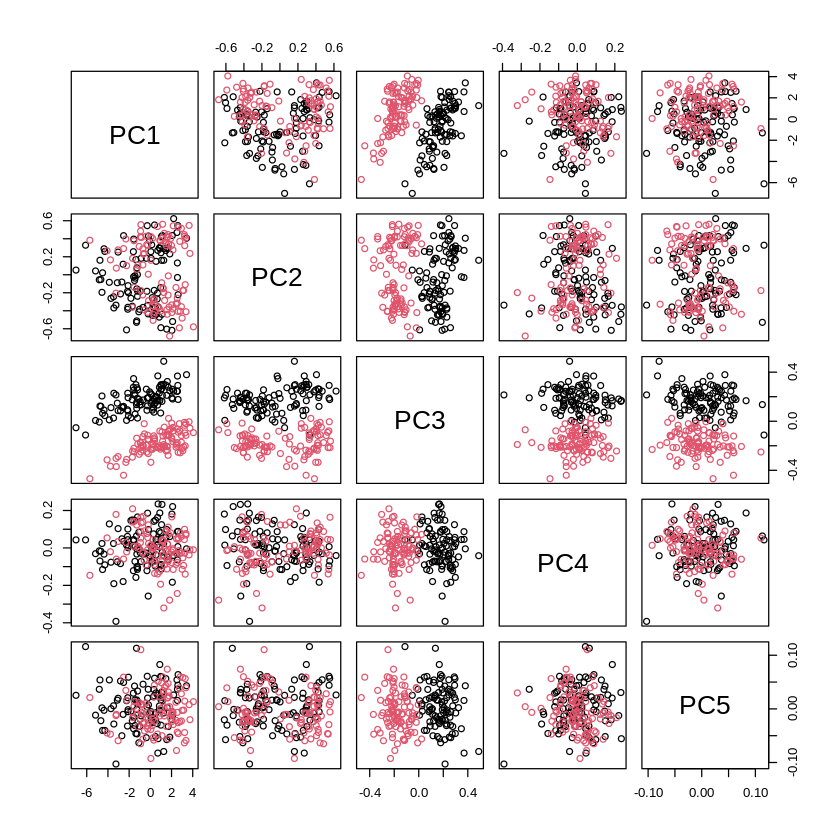

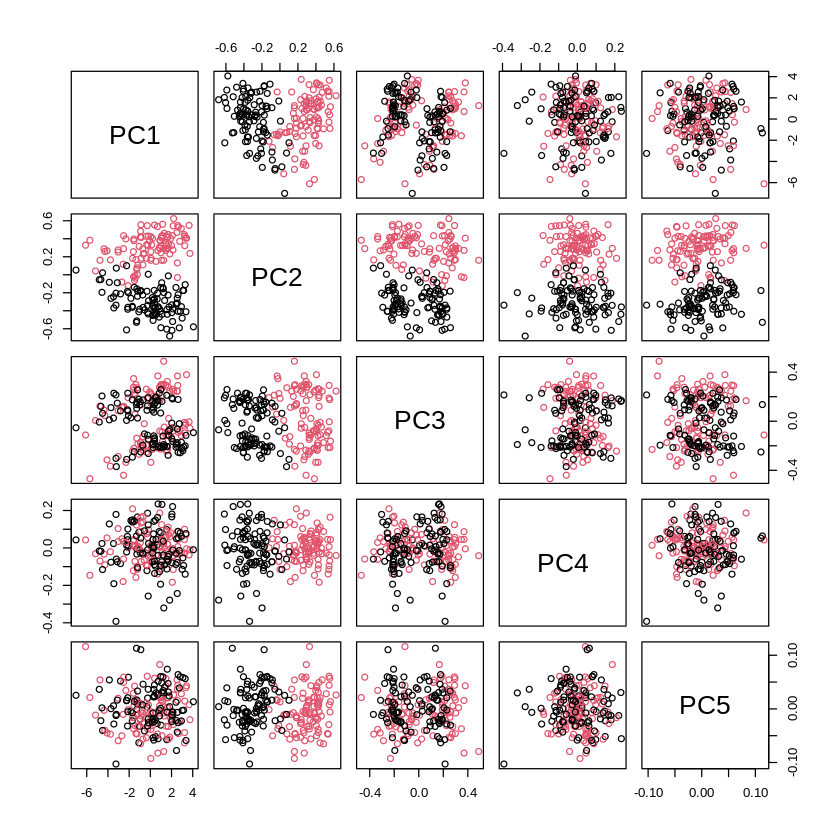

In [ ]:
pairs(crabs.vars.log.pca$x, col = crabs$sp)
pairs(crabs.vars.log.pca$x, col = crabs$sex)

Me di cuenta que la PCA mejora un montón las cosas. Esto funciono para encontrar las especies con altísima precisión.

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 99.5 %
    cc
base   2   1
   B 100   0
   O   1  99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  1  2
   F 50 50
   M 49 51


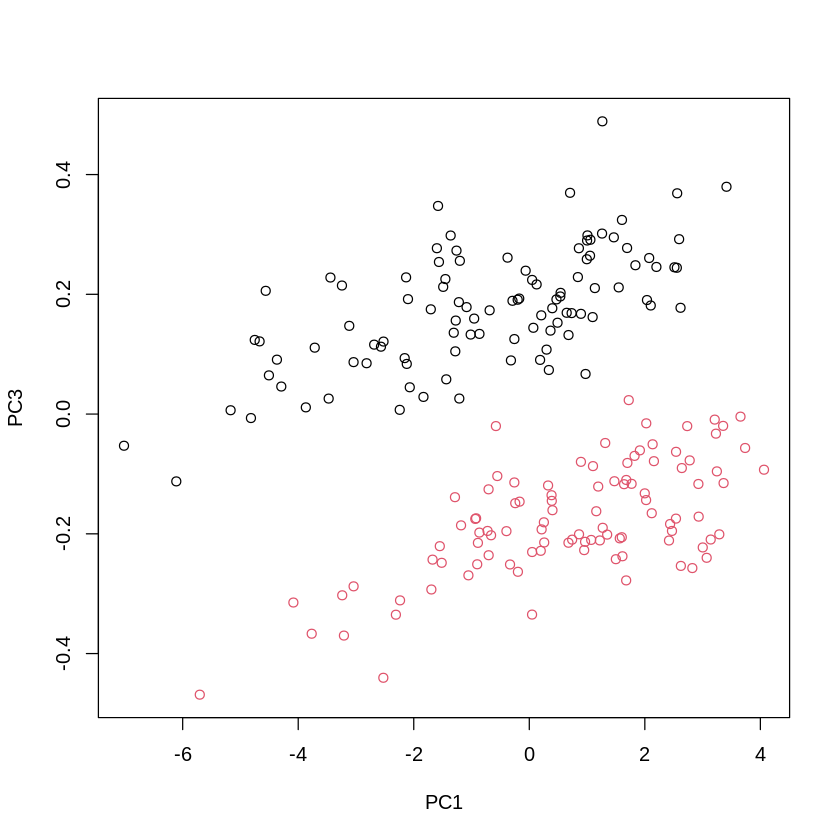

In [ ]:
c <- prcomp(scale(log(crabs.vars)))
plot(c$x[,c(1,3)],col = crabs$sp)
crabs.13 <- c$x[,c(1,3)]
crabs.13 <- scale(crabs.13)
cc <- kmeans(crabs.13,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Y esto para los sexos

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.5 %
    cc
base  2  1
   B 59 41
   O 48 52
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 94.5 %
    cc
base  2  1
   F 98  2
   M  9 91


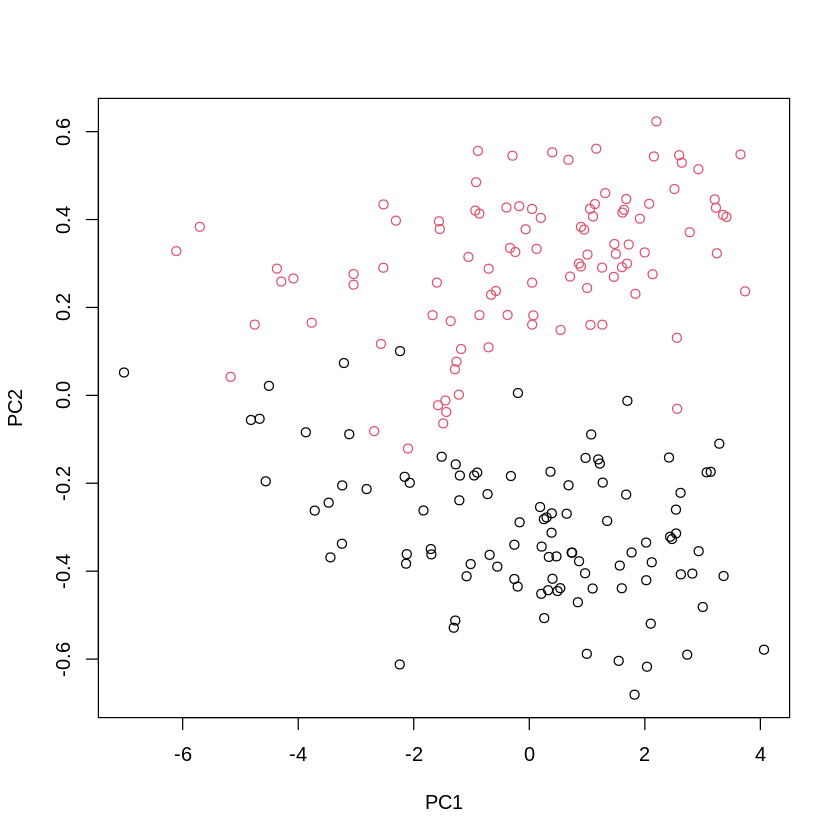

In [ ]:
plot(c$x[,c(1,2)], col = crabs$sex)
crabs.12 <- c$x[,c(1,2)]
crabs.12 <- scale(crabs.12)
cc <- kmeans(crabs.12,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Estuve renegando un montón y no me daban buenos resultados los métodos de clustering jerárquico. Probé con los métodos que vimos en clase y trabajando sobre distintas transformaciones de las variables. Supuse que deberían andar bien las mismas transformaciones que para el divisivo, pero no era así (al menos al usar la función para chequear las clasificaciones). No entendía por qué, hasta que grafiqué los resultados.

Resulta que el clustering se estaba haciendo bien! (más o menos).
Se pueden diferenciar dos clusters bien marcados en los gráficos. El problema es que no están a mayor nivel. Primero se dividen unos outliers y después podemos encontrar los clusters. Al usar cutree y pedirle dos grupos, me devuelve el de los outliers y el que necesitamos usar.

Creo que pude encontrar los clusters usando métodos jerárquicos, pero no estoy del todo seguro de cómo corroborarlo más que visualmente.

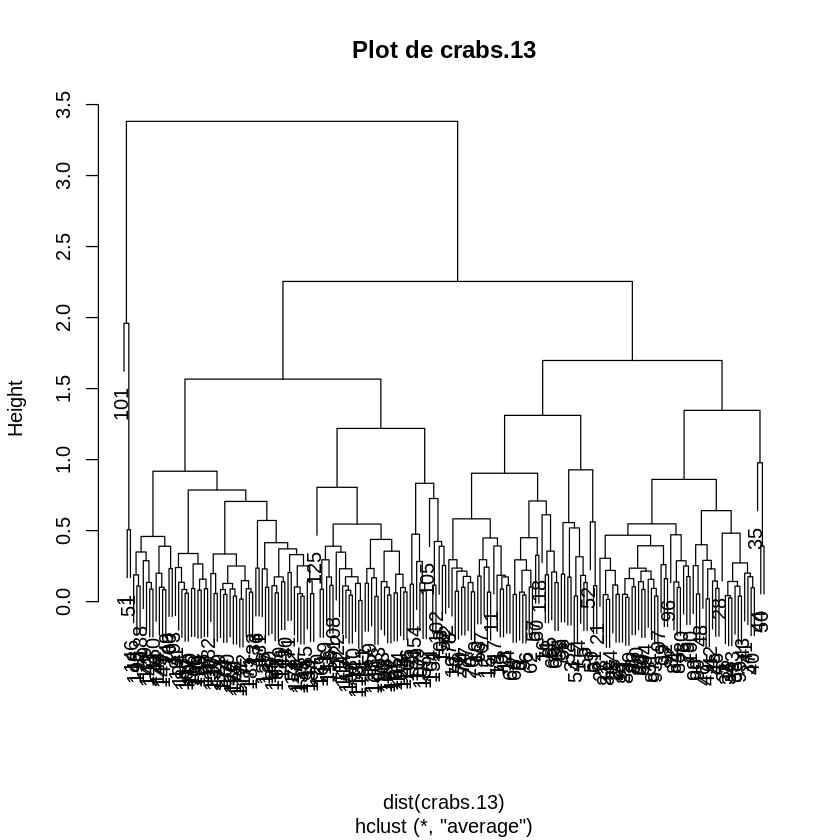

[1] "Sobre crabs.13"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  1  2
   B  2 98
   O  1 99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  2  1
   F 99  1
   M 98  2
[1] "Sobre crabs.12"
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 51.5 %
    cc
base  1  2
   B  5 95
   O  2 98
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 52.5 %
    cc
base  2  1
   F 99  1
   M 94  6


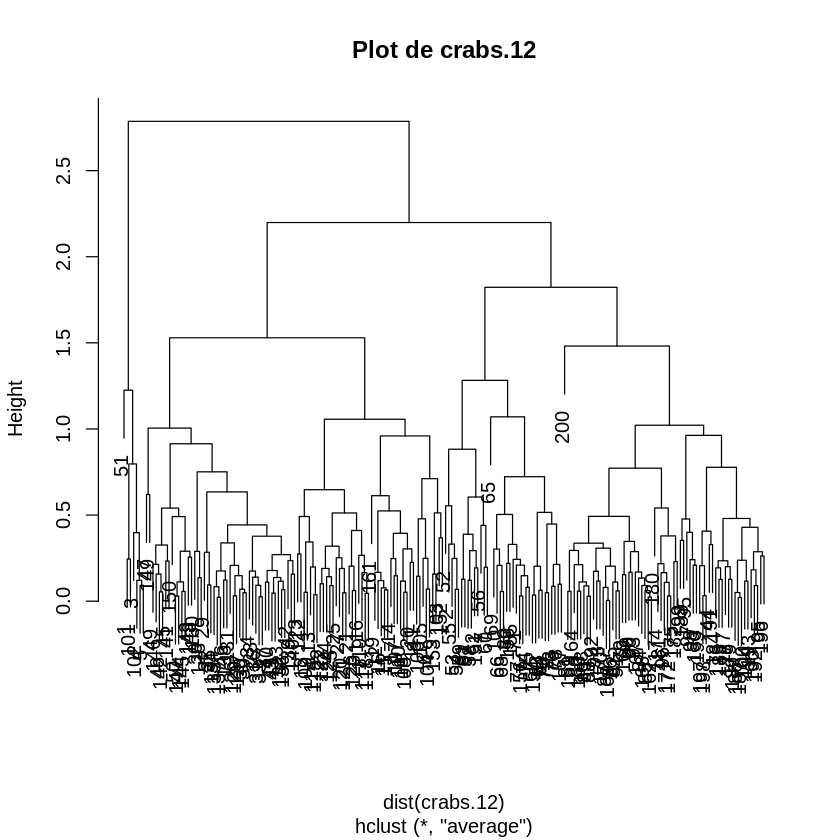

In [ ]:
cosa <- scale(prcomp(crabs.vars)$x)
c1 <- hclust(dist(crabs.13), method="average")
c2 <- hclust(dist(crabs.12), method="average")
a <- cutree(c1, k = 2)
b <- cutree(c2, k = 2)
plot(c1, main = "Plot de crabs.13")
plot(c2, main = "Plot de crabs.12")
print("Sobre crabs.13")
check.cluster(crabs$sp,a)
check.cluster(crabs$sex,a)
print("Sobre crabs.12")
check.cluster(crabs$sp,b)
check.cluster(crabs$sex,b)

Ahora analizamos Lampone

In [2]:
load("lampone.Rdata", verbose = T)
summary(lampone)

Loading objects:
  lampone


   anno         m33              m34              m35             m36         
 2006:19   Min.   : 13.31   Min.   :0.1600   Min.   :0.020   Min.   :0.00000  
 2007:30   1st Qu.: 37.70   1st Qu.:0.3900   1st Qu.:0.060   1st Qu.:0.01000  
           Median : 63.97   Median :0.6500   Median :0.110   Median :0.01000  
           Mean   : 69.47   Mean   :0.7751   Mean   :0.132   Mean   :0.01143  
           3rd Qu.: 80.30   3rd Qu.:0.9800   3rd Qu.:0.170   3rd Qu.:0.01000  
           Max.   :255.31   Max.   :2.9500   Max.   :0.540   Max.   :0.02000  
                                                                              
      m40         m41              m42               m43       
 Min.   :0   Min.   :0.0600   Min.   :0.01000   Min.   : 1.49  
 1st Qu.:0   1st Qu.:0.1400   1st Qu.:0.02000   1st Qu.: 5.45  
 Median :0   Median :0.2500   Median :0.03000   Median :10.42  
 Mean   :0   Mean   :0.2818   Mean   :0.03449   Mean   :15.09  
 3rd Qu.:0   3rd Qu.:0.3700   3rd Qu.:0.04000   

In [3]:
print(lampone[,c(1,143)])

    anno N_tipo
11  2006      2
12  2006      2
13  2006      2
14  2006      2
15  2006      2
16  2006      2
17  2006      2
18  2006      2
19  2006      2
96  2006     10
97  2006     10
98  2006     10
99  2006     10
100 2006     10
101 2006     10
102 2006     10
103 2006     10
104 2006     10
105 2006     10
152 2007      2
153 2007      2
154 2007      2
155 2007      2
156 2007      2
157 2007      2
158 2007      2
159 2007      2
160 2007      2
161 2007      2
162 2007      2
163 2007      2
164 2007      2
276 2007     10
277 2007     10
278 2007     10
279 2007     10
280 2007     10
281 2007     10
282 2007     10
283 2007     10
284 2007     10
285 2007     10
286 2007     10
287 2007     10
288 2007     10
289 2007     10
290 2007     10
291 2007     10
292 2007     10


Vemos que hay 2 años y 2 tipos de blueberry usadas, por lo que estaremos buscando 2 clusters

Sacamos las variables para trabajar sin problemas

In [4]:
lampone.vars <- lampone[,-c(1,143,144)] #Sacamos la variable 144 porque no es continua y hace explotar todo

Hacemos un kmeans sin nada, parece que ya de por sí es muy bueno para encontrar clusters del año pero no tanto para el tipo de blueberry

In [ ]:
cc <- kmeans(lampone.vars,cent=2)
check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
      cc
base    1  2
  2006 17  2
  2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    cc
base  1  2
  2  10 12
  10  9 18


No puedo aplicar una transformacion logaritmica porque hay valores en 0 y scale me deja cosas en nan. Toca hacer primero una PCA.


In [ ]:
lampone.vars.pca <- prcomp(lampone.vars)
cc <- kmeans(lampone.vars.pca$x,cent=2)
check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
      cc
base    2  1
  2006 17  2
  2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    cc
base  2  1
  2  10 12
  10  9 18


No mejoro nada, volvamos a ver relaciones entre elementos de la PCA.

Veamos las 6 primeras variable importantes (porque son demasiadas) de a pares. No parecen ayudar mucho.

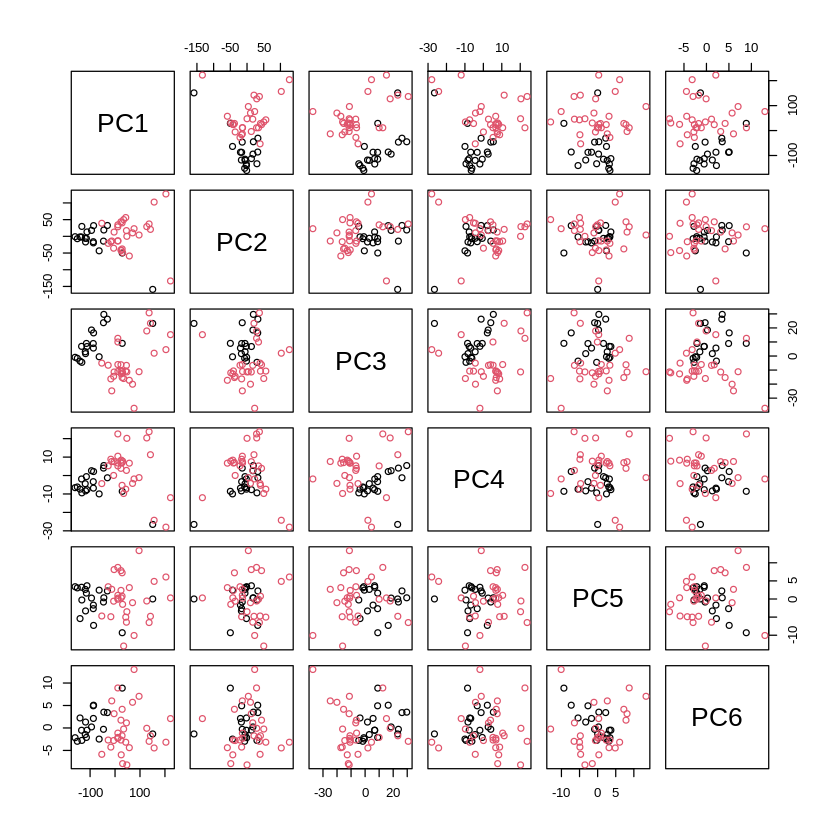

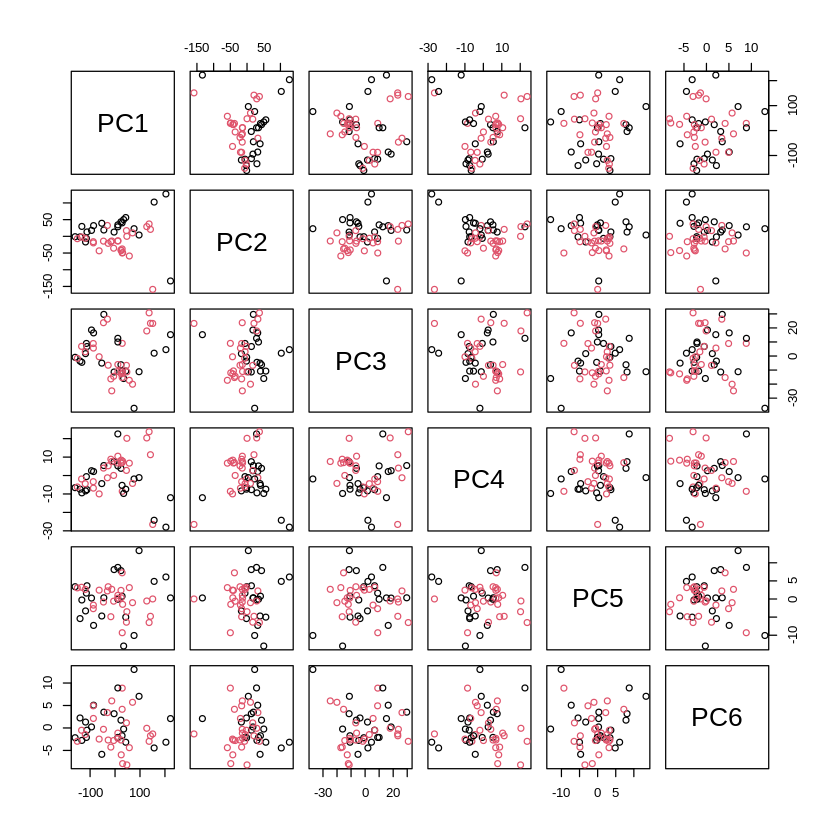

In [ ]:
pairs(lampone.vars.pca$x[,1:6], col = lampone$anno)
pairs(lampone.vars.pca$x[,1:6], col = lampone$N_tipo)

In [ ]:
lampone.vars.pca.scale <- scale(lampone.vars.pca$x)
c13 <- kmeans(lampone.vars.pca.scale[,c(1,3)],cent=2)
c46 <- kmeans(lampone.vars.pca.scale[,c(4,6)],cent=2)
c56 <- kmeans(lampone.vars.pca.scale[,c(5,6)],cent=2)
cc <- kmeans(lampone.vars.pca.scale[,1:6],cent=2)
print("Variables 1 y 3 de la PCA")
check.cluster(lampone$anno,c13$cluster)
check.cluster(lampone$N_tipo,c13$cluster)
print("Variables 4 y 6 de la PCA")
check.cluster(lampone$anno,c46$cluster)
check.cluster(lampone$N_tipo,c46$cluster)
print("Variables 5 y 6 de la PCA")
check.cluster(lampone$anno,c56$cluster)
check.cluster(lampone$N_tipo,c56$cluster)
print("Variables 1 a 6 de la PCA")
check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

[1] "Variables 1 y 3 de la PCA"
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 87.76 %
      cc
base    1  2
  2006 19  0
  2007  6 24
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    cc
base  1  2
  2  12 10
  10 13 14
[1] "Variables 4 y 6 de la PCA"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
      cc
base    2  1
  2006  5 14
  2007  9 21
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.1 %
    cc
base  2  1
  2   7 15
  10  7 20
[1] "Variables 5 y 6 de la PCA"
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.1 %
      cc
base    2  1
  2006  6 13
  2007  9 21
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 53.06 %
    cc
base  2  1
  2   7 15
  10  8 19
[1] "Variables 1 a 6 de la PCA"
Direct agreement: 2 of 2 pairs
C

La PCA tampoco ayudó

No parece que sea sencillo encontrar clusters. Con kmeans me doy cuenta que quizás usando las variables 1 y 3 obtenemos buenos resultados para clusterizar el año, pero no tan buenos como usando todas las variables sin modificar. Para el tema de la blueberry, no obtuve buenos resultados en ningún caso.

Para ver el clustering jerárquico, otra vez tenemos que observar el gráfico para no perder tiempo como en el problema de crabs. 

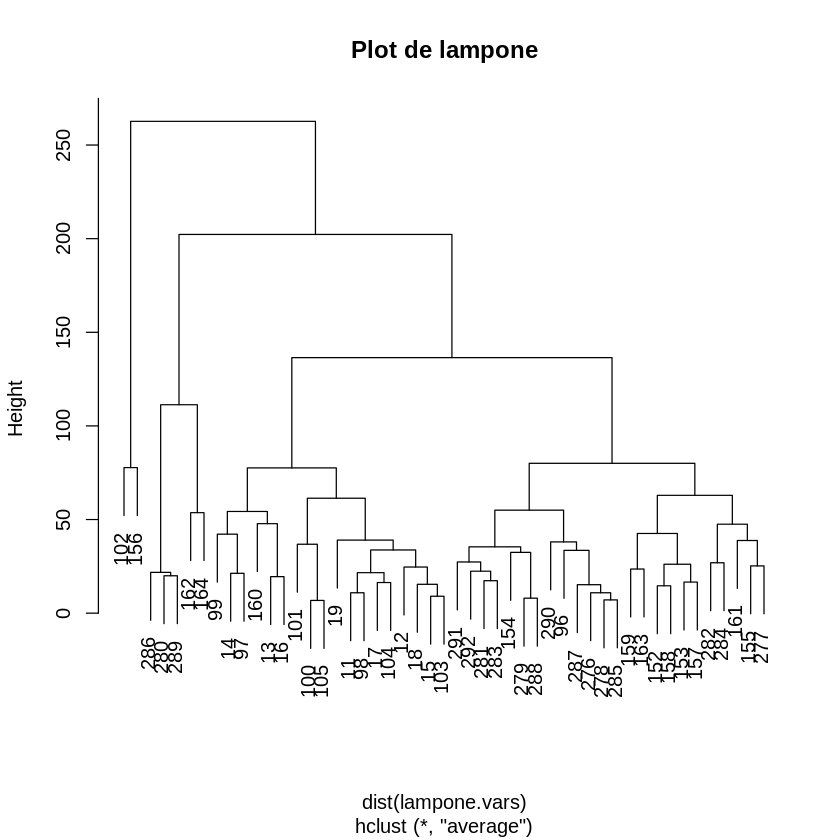

In [ ]:
c1 <- hclust(dist(lampone.vars), method="average")
a <- cutree(c1, k = 2)
plot(c1, main = "Plot de lampone")

Como era esperado, la división sin trabajar me da buenos resultados para hacer dos clusters que supongo yo son del año.

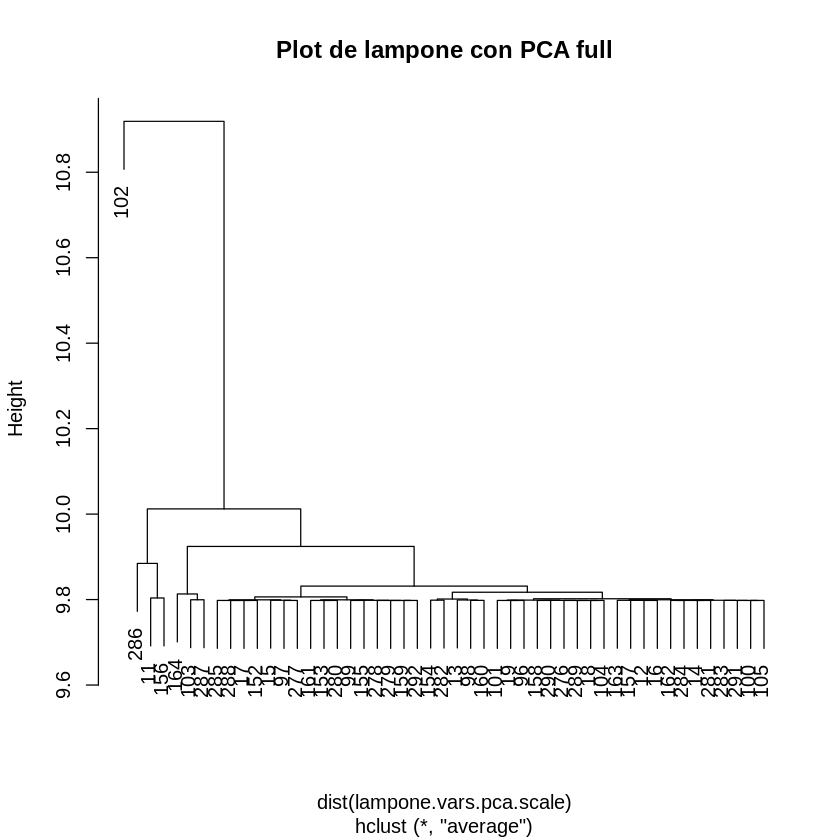

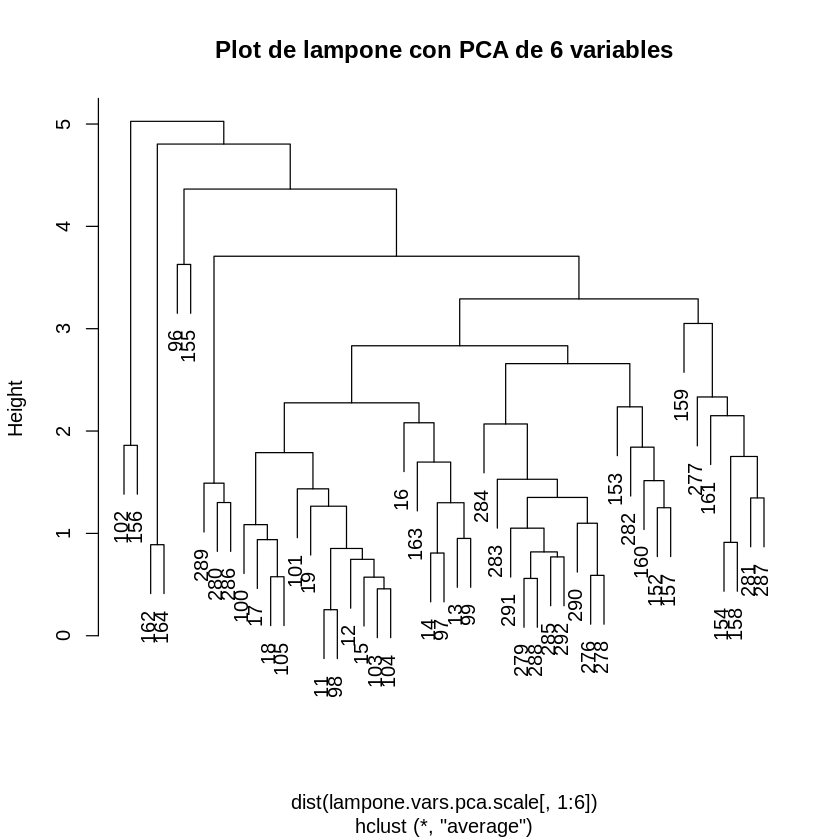

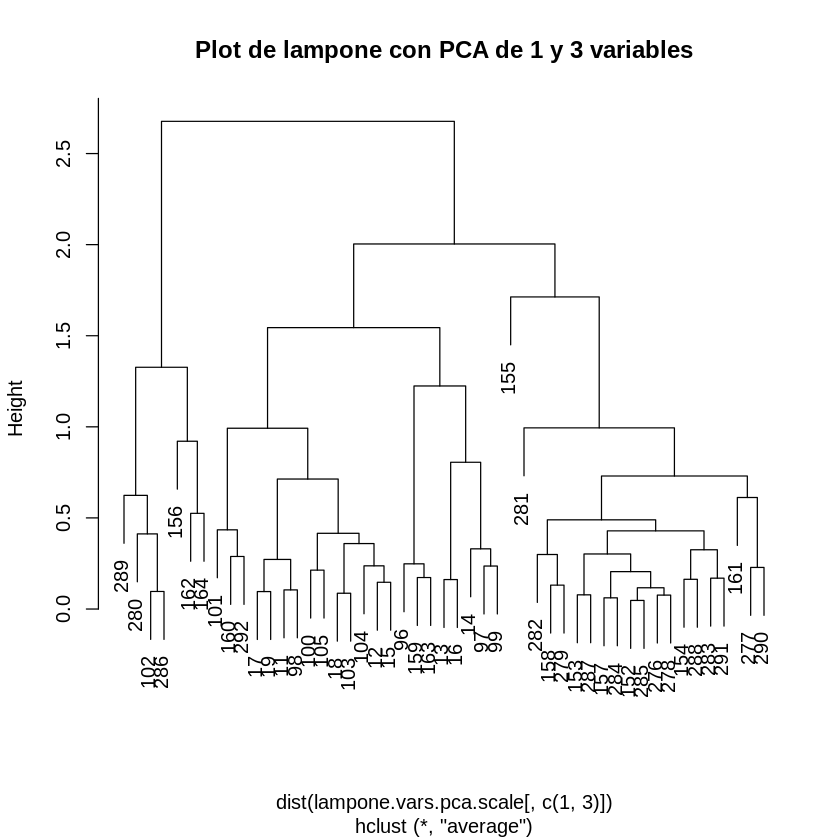

In [ ]:
c1 <- hclust(dist(lampone.vars.pca.scale), method="average")
c2 <- hclust(dist(lampone.vars.pca.scale[,1:6]), method="average")
c3 <- hclust(dist(lampone.vars.pca.scale[,c(1,3)]), method="average")
plot(c1, main = "Plot de lampone con PCA full")
plot(c2, main = "Plot de lampone con PCA de 6 variables")
plot(c3, main = "Plot de lampone con PCA de 1 y 3 variables")

Trabajando con la PCA como antes, otra vez obtenemos resultados feos. No es sencillo hallar el tipo de blueberry, y es más o menos sencillo hallar el año.

# Ejercicio 2

Funciones auxiliares para los métodos de clustering

In [5]:
#Funcion para generar n datasets con distribuciones uniformes para usar de referencia
crea.referencias <- function(original.dataset, n){
    #Dimensiones del dataset
    rows <- dim(original.dataset)[1]
    cols <- dim(original.dataset)[2]

    #Calculamos la pca
    pca <- prcomp(original.dataset)
    #Obtenemos los rangos de las variables, range me da el minimo y el maximo
    rangos <- apply(pca$x, 2, range)

    #Dataset de referencia, tiene que ser una lista para soportar las multiples dimensiones
    reference.datasets <- list()

    #Generamos los n datasets de referencia
    for(i in 1:n){
        #Generamos un dataset de referencia vacio
        reference.dataset <- c()

        #Generamos las columnas de uno de los datasets
        for(j in 1 : min(rows, cols)){
			    uniformColumn = runif(rows, rangos[1, j], rangos[2, j])
			    reference.dataset = cbind(reference.dataset, uniformColumn)
		    }	
        
        #Añadimos el dataset de referencia a la lista
        reference.datasets[[i]] <- reference.dataset
    }

    return (reference.datasets)
}

#Funcion magica provista por Pablo Granitto
stability.score <- function(n, ind1, ind2, cc1, cc2){
    v1 <- v2 <- rep(0,n)
    v1[ind1] <- cc1
    v2[ind2] <- cc2
    #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1%*%t(v1))
    m1 <- a / -a + 2*(a==round(a))
    m1[is.nan(m1)]<- 0
    a <- sqrt(v2%*%t(v2))
    m2 <- a / -a + 2*(a==round(a))
    m2[is.nan(m2)] <- 0
    #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
    validos <- sum(v1*v2>0)
    score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
    return(score)
}


Gap Statistic

In [6]:
gap.statistic <- function(dataset, maxK, B){
    #Vector Wkb de las referencias
    Wkb.star <- double(maxK)
    #Vetor para almacenar el gap
    gap <- double(maxK)
    #Vector para las desviaciones estandar
    sk <- double(maxK)
    uniform.references <- crea.referencias(dataset, B)

    for(k in 2:maxK){
        #Medida de dispersion de cluster de tamaño k
        Wk <- kmeans(dataset, k)$tot.withinss
        #Busco las medidas de dispersion de hacer kmeans de cada referencia
        for(b in 1:B){
            Wkb.star[b] <- kmeans(uniform.references[[b]],k)$tot.withinss
        }
        #Obtenemos la gap statistic
        gap[k] <- (1/B) * sum(log(Wkb.star)) - log(Wk)
        lhat <- (1/B) * sum(log(Wkb.star))
        sd.k <- sqrt(1/B * sum((log(Wkb.star) - lhat)^2))
        sk[k] <- sd.k * sqrt(1 + 1/B)
    }

    #Buscamos la cantidad de clusters adecuada según la desigualdad
    suggested.clusters <- 2
	  while(suggested.clusters < maxK && 
	      gap[suggested.clusters] < gap[suggested.clusters + 1] - sk[suggested.clusters + 1]){
          
		suggested.clusters = suggested.clusters + 1
	  }
    return(suggested.clusters)
}

Stability 

In [7]:
stability.method <- function(dataset, k, nRep){
    #Cantidad de filas
    rows <- dim(dataset)[1]

    #Generamos nRep muestras del dataset subsampleadas al 90%
    subsamples <- list()
    for(i in 1:nRep){
        subsamples[[i]] <- sample(rows, rows*0.9)
    }

    #Calculamos el valor de estabilidad segun la cantidad de clusters
    stability <- list()
    stability.mean <- c()
    for(cluster.number in 2:k){
        #Calculamos el clustering para cada subsample
        kmeans.subsamples <- list()
        for(r in 1:nRep){
            kmeans.subsamples[[r]] <- kmeans(dataset[subsamples[[r]], ], cluster.number)$cluster
        }

        #Calculamos la estabilidad comparando cada referencia creada
        stability.scores <- c()
        for(ind1 in 1 : (nRep - 1)){
            for(ind2 in (ind1 + 1) : nRep){
                stability.scores <- c(stability.scores, stability.score(rows, subsamples[[ind1]], subsamples[[ind2]], kmeans.subsamples[[ind1]], kmeans.subsamples[[ind2]]))
            }
        }
        stability[[cluster.number]] <- stability.scores
        #Sacamos la media de los scores de estabilidad para obtener la cantidad preferida de clusters (tambien se puede hacer viendo histogramas)
        stability.mean <- c(stability.mean, mean(stability.scores))
    }
    l <- list(stability = stability, mean.stability = stability.mean)
    return(l) 
}

Analizamos el problema de 4 gausianas. Lo corri muchisimas veces, y hasta lo dejé en bucle, pero el método de la estabilidad no logró hallar 4 clusters

[1] 0.6778233 0.8591160 0.7604108 0.7883962
[1] "Clusters segun stability:  3"
[1] "Clusters segun gap:  4"


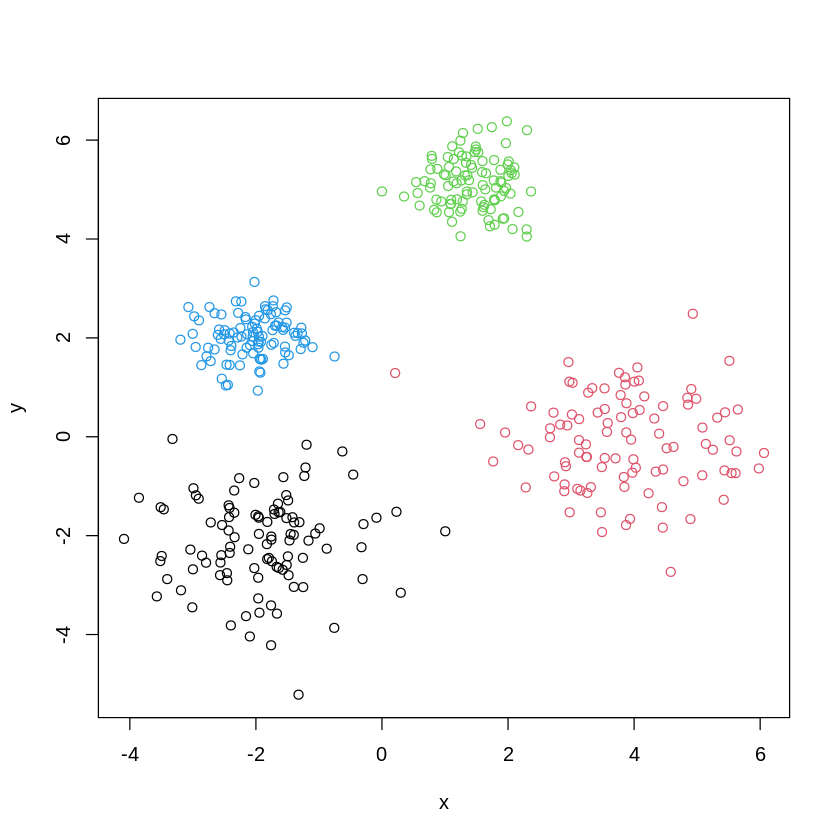

In [10]:
gausianas <- function(tot.puntos){
  gap=2
  x<-rnorm(tot.puntos,mean=-gap)
  y<-rnorm(tot.puntos,mean=-gap)
  gausianas<-cbind(x,y,rep(1,length(x)))
  x<-rnorm(tot.puntos,mean=2*gap)
  y<-rnorm(tot.puntos,mean=0)
  gausianas<-rbind(gausianas,cbind(x,y,rep(2,length(x))))
  x<-rnorm(tot.puntos,mean=0.7*gap,sd=0.5)
  y<-rnorm(tot.puntos,mean=2.5*gap,sd=0.5)
  gausianas<-rbind(gausianas,cbind(x,y,rep(3,length(x))))
  x<-rnorm(tot.puntos,mean=-gap,sd=0.5)
  y<-rnorm(tot.puntos,mean=gap,sd=0.5)
  gausianas<-rbind(gausianas,cbind(x,y,rep(4,length(x))))
  return(gausianas)
}
g <- gausianas(100)

plot(g[,-3], col = g[,3])

gap <- gap.statistic(g[,-3], 5, 1000)
stab <- stability.method(g[,-3], 5, 10)

print(stab$mean.stability)
print(paste("Clusters segun stability: ", which.max(stab$mean.stability) + 1)) #Usamos como criterio el máximo de las medias de el stability score
print(paste("Clusters segun gap: ", gap))

In [11]:
data(iris)

Vemos que iris es un problema dificil para hacer clusters, stability se decide por muy poco.

In [16]:
gap <- gap.statistic(iris[,-5], 5, 1000)
stab <- stability.method(iris[,-5], 5, 10)

print(stab$mean.stability)
print(paste("Clusters segun stability: ", which.max(stab$mean.stability) + 1))
print(paste("Clusters segun gap: ", gap))

[1] 1.0000000 0.9936321 0.7188846 0.7576902
[1] "Clusters segun stability:  2"
[1] "Clusters segun gap:  3"


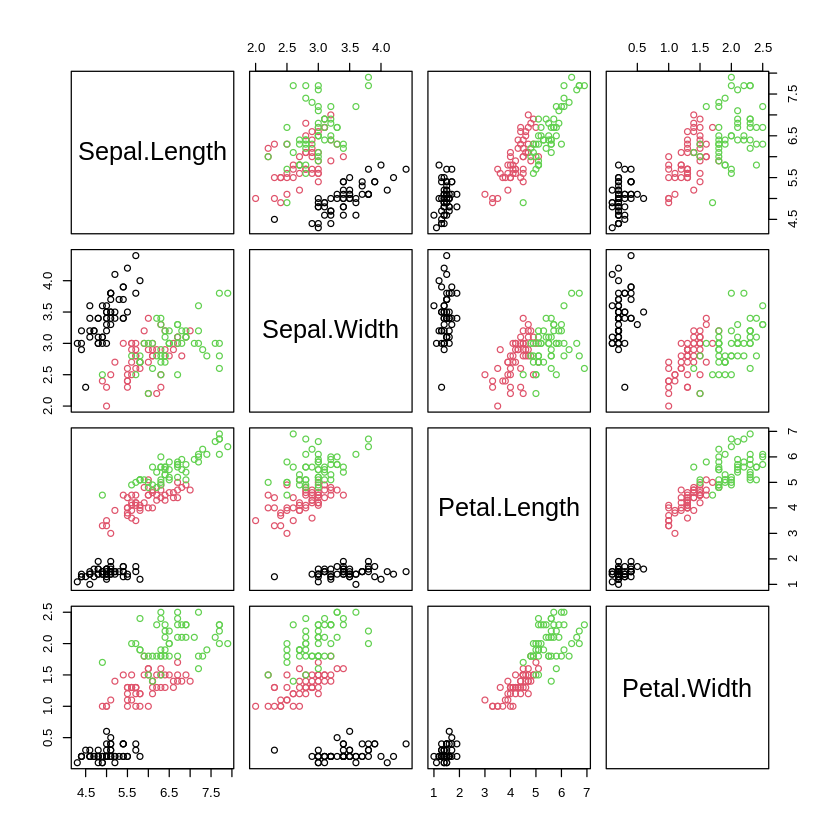

In [ ]:
plot(iris[,-5], col = iris[,5])

Iris tiene el problema que dos clusters parecen uno, eso puede explicar las dificultades que tiene el método de la estabilidad para elegir correctamente la cantidad

Para Lampone no tengo muchas expectativas

In [18]:
gap <- gap.statistic(lampone.vars, 5, 1000)
stab <- stability.method(lampone.vars, 5, 10)

print(stab$mean.stability)
print(paste("Clusters segun stability: ", which.max(stab$mean.stability) + 1))
print(paste("Clusters segun gap: ", gap))

[1] 0.9450460 0.8709790 0.6778209 0.7778667
[1] "Clusters segun stability:  2"
[1] "Clusters segun gap:  2"


Al correrlo muchas veces, pude ver que en general stability elige bien 2 clusters, pero gap a veces eligió 3. Hacer un plot de lampone es muy difícil, pero la PCA de dos variables me da unas pistas.

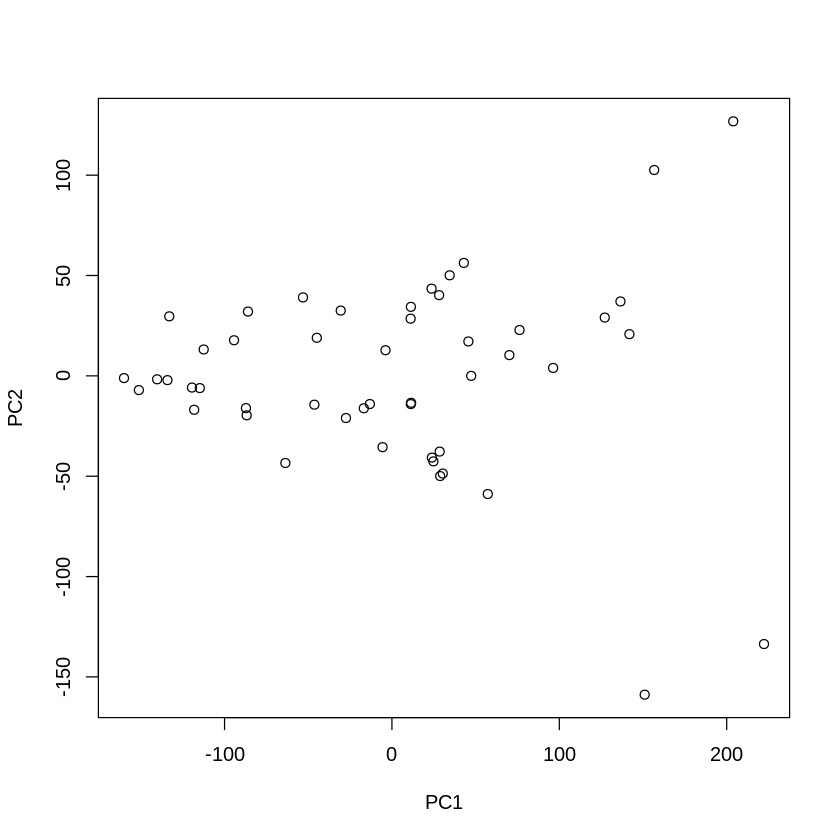

In [ ]:
plot(lampone.vars.pca$x[,1:2])

Parece ser que hay 3 clusters, dos en las esquinas y uno en el centro. Eso puede explicar los resultados de gap (parecerían ser clusters "naturales")

Opcional: Vamos analizar un dataset de ventas históricas de videojuegos a ver qué cosas podemos hallar. Es una muestra relativamente pequeña, de 224 juegos.

El dataset tiene información que no me interesa, como el publisher del videojuego o las ventas en distintas regiones así que las sacamos.

In [19]:
gamesData <- read.csv('Video Games Dataset.csv')
summary(gamesData)
gamesData <- gamesData[,1:5] 

      Rank           Name             Platform              Year     
 Min.   :  1.0   Length:199         Length:199         Min.   :1982  
 1st Qu.: 55.5   Class :character   Class :character   1st Qu.:1999  
 Median :107.0   Mode  :character   Mode  :character   Median :2007  
 Mean   :110.1                                         Mean   :2005  
 3rd Qu.:163.5                                         3rd Qu.:2011  
 Max.   :224.0                                         Max.   :2016  
                                                                     
    Genre            Publisher         NorthAmerica_Sales EurpeanUnion_Sales
 Length:199         Length:199         Min.   : 0.000     Min.   : 0.000    
 Class :character   Class :character   1st Qu.: 2.590     1st Qu.: 1.633    
 Mode  :character   Mode  :character   Median : 3.280     Median : 2.270    
                                       Mean   : 4.701     Mean   : 3.046    
                                       3rd Qu.: 5.170  

Veamos como se relacionan las variables

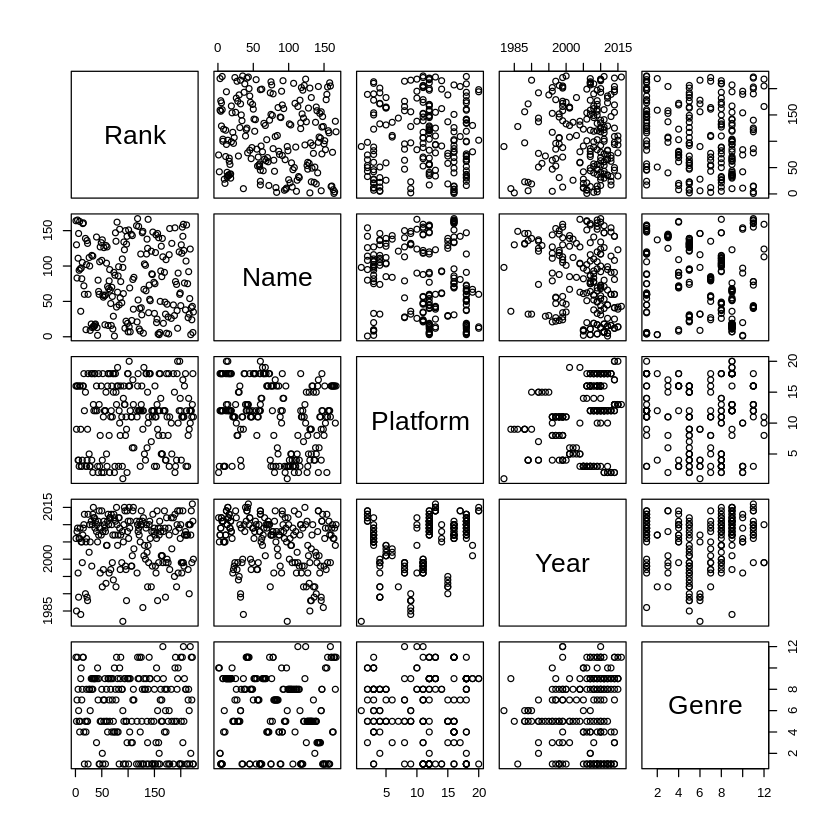

In [20]:
plot(gamesData)

No quiero renegar con la PCA porque hay muchos valores de texto, pero ya viendo los datos como están hay algo que me llama la atención: el año parece que segmenta bastante bien ciertas cosas. Vemos que al unir año y rank hay una especie de división. Quiero ver un poco más qué información me da eso. 

Buscamos clusters en base a esa variable.

In [21]:
gap <- gap.statistic(gamesData[,4, drop=FALSE], 10, 1000)
stab <- stability.method(gamesData[,4, drop=FALSE], 10, 10)

print(stab$mean.stability)
print(paste("Clusters segun stability: ", which.max(stab$mean.stability) + 1))
print(paste("Clusters segun gap: ", gap))

[1] 1.0000000 0.8042378 0.7140545 0.7507003 0.7419995 0.8077635 0.7739515
[8] 0.7323240 0.6962641
[1] "Clusters segun stability:  2"
[1] "Clusters segun gap:  2"


Los métodos me recomiendan dos clusters, vamos a aplicar kmeans a ver a qué llegamos.

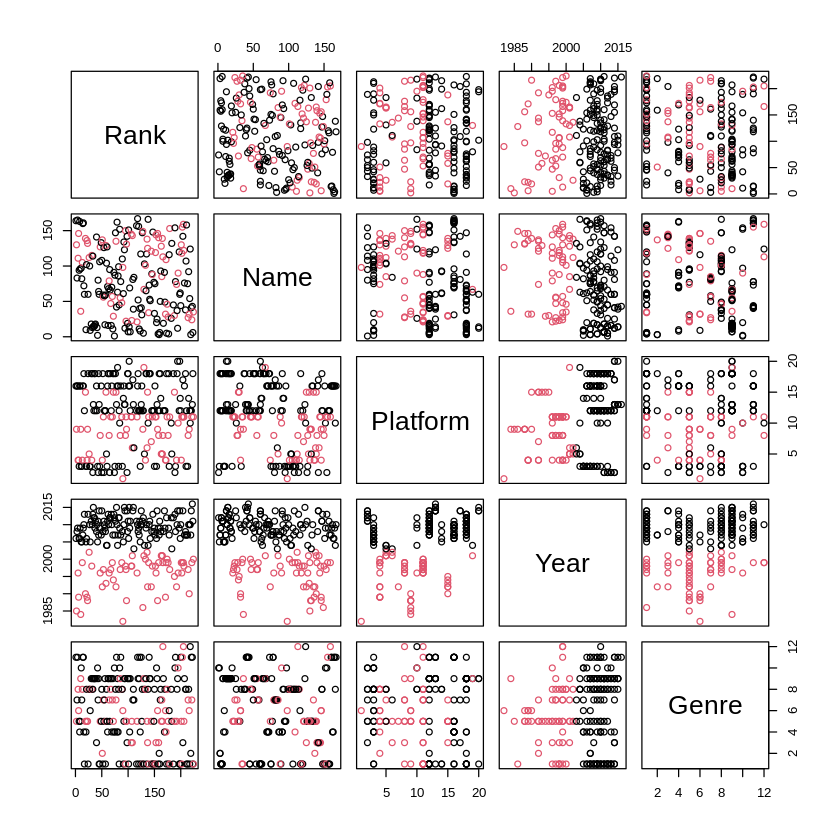

In [22]:
c5 <- kmeans(gamesData[,4, drop=FALSE],cent=2)
plot(gamesData, col = c5$cluster)

Efectivamente, dos clusters me dividieron bastante bien los videojuegos en aquellos anteriores y posteriores al año 2000. Me parecía que tenía algo que ver con la plataforma, porque los géneros están mezclados entre los años.

In [23]:
print(unique(gamesData[gamesData$Year < 2000, ]$Platform))
print(unique(gamesData[gamesData$Year > 2000, ]$Platform))

[1] "NES"  "GB"   "SNES" "N64"  "PS"   "2600" "GEN"  "PC"  
 [1] "Wii"  "DS"   "X360" "PS3"  "GBA"  "3DS"  "PS4"  "XB"   "PC"   "PSP" 
[11] "XOne" "GC"   "WiiU"


Olvidémonos de los juegos de PC, porque están desde hace muchos años (1962 con la introducción de Spacewar! para la PDP-1).

Los videojuegos más vendidos publicados antes del año 2000 salieron para: NES, Gameboy, SNES, Nintendo 64, Playstation 1, Atari 2600, Sega Genesis y PC.

Mientras que los videojuegos más vendidos publicados después del año 2000 salieron para:
Wii, Nintendo DS, Xbox 360, Playstation 3, Gameboy Advance, Nintendo 3DS, Playstation 4, Xbox, PC, PSP, Xbox One, Gamecube y WiiU.

Toda esta segunda tanda de consolas salieron a la venta después del 2000. Me parece interesante que ningún juego publicado después del 2000 se publicó en alguna consola anterior al 2000 (al menos en concepto de ventas, probablemente lo hayan hecho pero no se vendieron muchas copias). Esto se puede explicar considerando que las nuevas consolas son mucho más potentes, la industria de videojuegos maduró enormemente después del año 2000 y el hecho que los videojuegos se volvieron más accesibles y masivos a partir de la 6ta generación de consolas. Nadie habrá querido hacer videojuegos para consolas que quedaron viejas.